In [150]:
%pylab inline

import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
file = '../parameters/glottis/all_lf.json'

In [3]:
with open(file, 'r') as f:
    js = json.load(f)

In [4]:
import jq

In [5]:
jgen=jq.compile(""" .[] | paths(scalars) | join(".")""").input(js)
jgen=jq.compile(""" .[] 
                   | paths(scalars) as $p 
                   | { (join(".")):(getpath($p)) } """).input(js)
jgen=jq.compile(""" .[] 
                   | { paths(scalars) as $p   
                       | ($p|join(".")): getpath($p) }  """).input(js)

ValueError: jq: error: syntax error, unexpected '(', expecting '}' (Unix shell quoting issues?) at <top-level>, line 2:
                   | { paths(scalars) as $p                               
jq: error: May need parentheses around object key expression at <top-level>, line 2:
                   | { paths(scalars) as $p                          
jq: 2 compile errors

In [6]:
jgen=jq.compile("""  .[] | leaf_paths as $p | {($p|join(".")) : getpath($p)} | @csv  """).input(js)
[x for x  in jgen]

ValueError: object ({"headers.g...) cannot be csv-formatted, only array

In [195]:
import zipfile
import random
import warnings
from vocalsims.interfacing.json_object import JSONObject


def js_from_zip(zff, n=10):
    with zipfile.ZipFile(zff) as zf:
        fl = zf.filelist
        for ii,file in enumerate(random.sample(fl,n)):
            try:
                jj = JSONObject(json.loads(zf.read(file).decode()))
                jj['filename'] = file.filename
                flatjs = {'.'.join(str(y) for y in x[0]):x[1] for x in jj.iter_tree()} 
                yield flatjs
            except (json.JSONDecodeError, TypeError):
                warnings.warn('JSON  decode error in file '+str(file))

In [196]:
zipf = '/home/goios/Data/Simulations/clarinet_attack_random/jsonsims.zip'


In [197]:
jo=[x for x in js_from_zip(zipf,n=1000)]

In [198]:
import pandas
#flatjs=[{'.'.join(str(y) for y in x[0]):x[1] for x in jo[ii].iter_tree()} for ii in range(len(jo))]
df = pandas.DataFrame(jo)


In [199]:
df['transient_duration'] = df['analysis.t_trans_end'] - df['analysis.t_trans_start']
df1=df.loc[:,[len(df[cc].unique())>1 for cc in df.columns]]
#[cc for cc in df1.columns]

<AxesSubplot:ylabel='Frequency'>

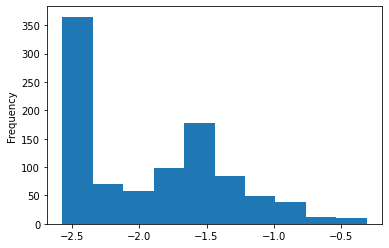

In [200]:
import numpy as np
np.log10(df1.transient_duration).plot.hist()

<AxesSubplot:xlabel='transient_duration', ylabel='analysis.hrat1_abs_trans'>

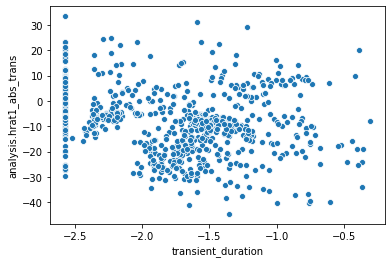

In [201]:
import seaborn as sns
sns.scatterplot(x=np.log10(df1.transient_duration),y=df1['analysis.hrat1_abs_trans'])

<AxesSubplot:xlabel='analysis.zb_0_f', ylabel='simulation.params.tracts.bore.elements.0.length'>

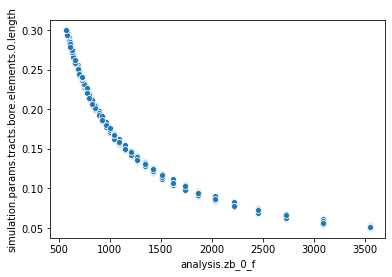

In [202]:
sns.scatterplot(df1['analysis.zb_0_f'],df1['simulation.params.tracts.bore.elements.0.length'])

<AxesSubplot:xlabel='analysis.zb_0_f', ylabel='analysis.zb_0_z'>

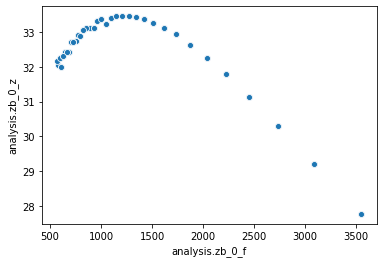

In [203]:
sns.scatterplot(df1['analysis.zb_0_f'],df1['analysis.zb_0_z'])

<AxesSubplot:xlabel='transient_duration'>

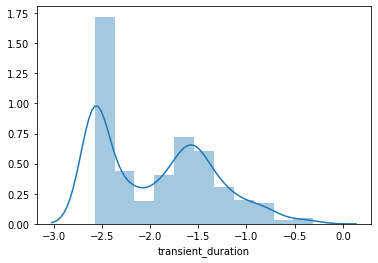

In [204]:
sns.distplot(np.log10(df1['transient_duration']))

<AxesSubplot:xlabel='analysis.hb1_abs_sus'>

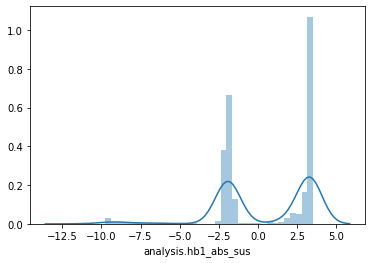

In [205]:
sns.distplot(np.log10(df1['analysis.hb1_abs_sus']),bins=40)

In [206]:
df2 = df1[(df1['analysis.hb1_abs_sus']>100)&(df1['transient_duration']>0.01)]
len(df2)

449

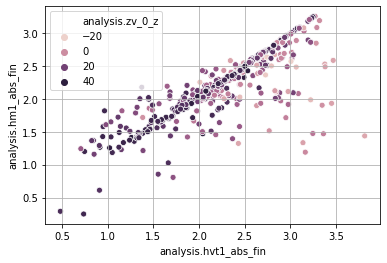

In [207]:
import seaborn as sns
#df2 = df1#.sample(200)
ax=sns.scatterplot(data=df2,x=np.log10(df2['analysis.hvt1_abs_fin']),y=np.log10(df2['analysis.hm1_abs_fin']),hue=df2['analysis.zv_0_z'])
#ax.set_xlim(0,4)
#ax.set_ylim(0,4)
ax.grid()

/home/goios/.pyenv/versions/vocalsims/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


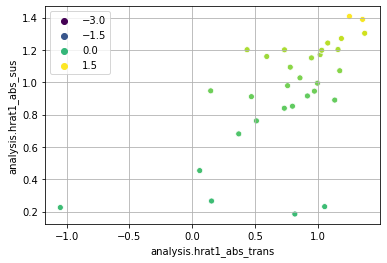

In [208]:
ax=sns.scatterplot(data=df2,x=np.log10(df2['analysis.hrat1_abs_trans']),y=np.log10(df2['analysis.hrat1_abs_sus']),hue=np.log10(df2['analysis.hvt1_abs_sus']/df2['analysis.hb1_abs_sus']),palette='viridis')
ax.grid()


/home/goios/.pyenv/versions/vocalsims/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


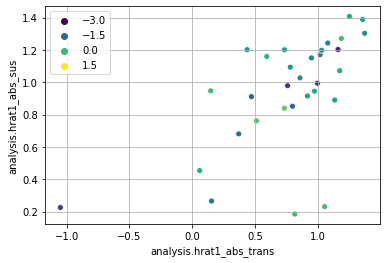

In [229]:
ax=sns.scatterplot(data=df2,x=np.log10(df2['analysis.hrat1_abs_trans']),y=np.log10(df2['analysis.hrat1_abs_sus']),hue=np.log10(df2['analysis.hvt3_abs_sus']/df2['analysis.hvt1_abs_sus']),palette='viridis')
ax.grid()


/home/goios/.pyenv/versions/vocalsims/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


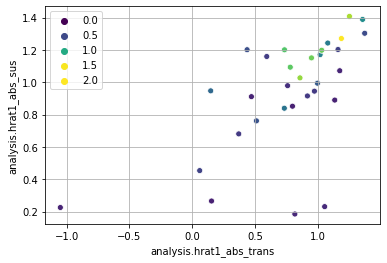

In [231]:
ax=sns.scatterplot(data=df2,x=np.log10(df2['analysis.hrat1_abs_trans']),y=np.log10(df2['analysis.hrat1_abs_sus']),hue=np.log10(df2['analysis.final amplitude']/df2['analysis.hb1_abs_sus']),palette='viridis')
ax.grid()


In [209]:
df3=df2[(df2['analysis.hrat1_abs_trans']>1)&(df2['analysis.hrat1_abs_trans']/df2['analysis.hrat1_abs_sus']>2)]
df3

,simulation.start,simulation.params.environment.reed.resonance frequency,simulation.params.environment.reed.quality factor,simulation.params.environment.reed.rest opening,simulation.params.perturbation.blowing pressure,simulation.params.tracts.vocal.description,simulation.params.tracts.vocal.elements.0.type,simulation.params.tracts.vocal.elements.0.radius,simulation.params.tracts.vocal.elements.0.output radius,simulation.params.tracts.vocal_step.elements.0.radius,...,analysis.zb_1_z,analysis.zb_2_f,analysis.zb_2_z,analysis.zb_3_f,analysis.zb_3_z,analysis.zb_4_f,analysis.zb_4_z,filename,analysis.error,transient_duration
615,20200819_111434,2314.547088,1.918847,0.000005,2476.561844,narrow tongue,cylinder,0.001004,NaN,0.002659,...,26.749171,4019.53125,22.282555,5636.71875,18.789861,7259.765625,16.030501,Users/goios/Data/Simulations/clarinet_attack_r...,NaN,0.101724
727,20200816_091407,2739.079052,0.798757,0.000006,2016.875972,tongue opening exponentially into tract,exponential horn,0.001517,0.01,0.006283,...,25.458885,5507.81250,19.959581,7734.37500,16.040100,9966.796875,13.170130,Users/goios/Data/Simulations/clarinet_attack_r...,NaN,0.018551


In [218]:
df3r = df3.sample().iloc[0]
print (df3r.name, df3r.filename.split('/')[-1])

df.loc[df3r.name]

615 tongue_vt_open_tuning_20200819_111601.json


simulation.start                                                                20200819_111434
simulation.params.description                 a clarinet with vocal tract and ranges for par...
simulation.params.version                                                              20200805
simulation.params.simulation.__sample rate                                               192000
simulation.params.simulation.sample rate                                                  48000
                                                                    ...                        
analysis.zb_4_f                                                                         7259.77
analysis.zb_4_z                                                                         16.0305
filename                                      Users/goios/Data/Simulations/clarinet_attack_r...
analysis.error                                                                              NaN
transient_duration                      

In [232]:
df3r[['simulation.start','transient_duration','analysis.f0','analysis.final amplitude', 'analysis.hb1_abs_sus','analysis.hb1_abs_trans']]

simulation.start            20200819_111434
transient_duration                 0.101724
analysis.f0                         388.716
analysis.final amplitude            4482.72
analysis.hb1_abs_sus                1953.27
analysis.hb1_abs_trans              637.002
Name: 615, dtype: object

In [220]:
fn=jo[df3r.name]['filename']
fn

'Users/goios/Data/Simulations/clarinet_attack_random/json_outputs/tongue_vt_open_tuning_20200819_111601.json'

In [221]:
zipf

'/home/goios/Data/Simulations/clarinet_attack_random/jsonsims.zip'

In [222]:
with zipfile.ZipFile(zipf) as zf:
    with zf.open(fn) as jsf:
        js = jsf.readlines()[0].decode()
        
print(json.loads(js)['simulation']['start'])


20200819_111434


In [223]:
from vocalsims.reed_up_downstream_dyn import ReedSimulation
sim = ReedSimulation()
sim.from_json(JSONObject(js)["simulation/params"])
sim.simulate()


No radiation filter


(-4000.0, 4000.0)

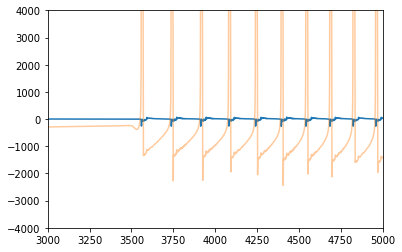

In [226]:
figure()
plot(sim.p_in+sim.p_out)
plot(sim.p_vt_in+sim.p_vt_out,alpha=.4)
xlim(3000,5000)
ylim(-4000,4000)